In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
assay_names = ['DNase', 'H3K36me3', 'H3K27me3', 'H3K27ac', 'H3K4me1', 'H3K4me3', 'H3K9me3']
data_path_25bp = '/scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/25bp_Data/'
data_path_100bp = '/scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/100bp_Data/'
assays = {}
for i, assay in enumerate(assay_names):
    assay_index = "{:02d}".format(i+1)
    assays[assay] = np.load(data_path_25bp+"T01A"+assay_index+".chr5.npy")

assays[assay_names[0]].shape


(7261531,)

/export/home/users/sbatra/miniconda/yes/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/export/home/users/sbatra/miniconda/yes/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


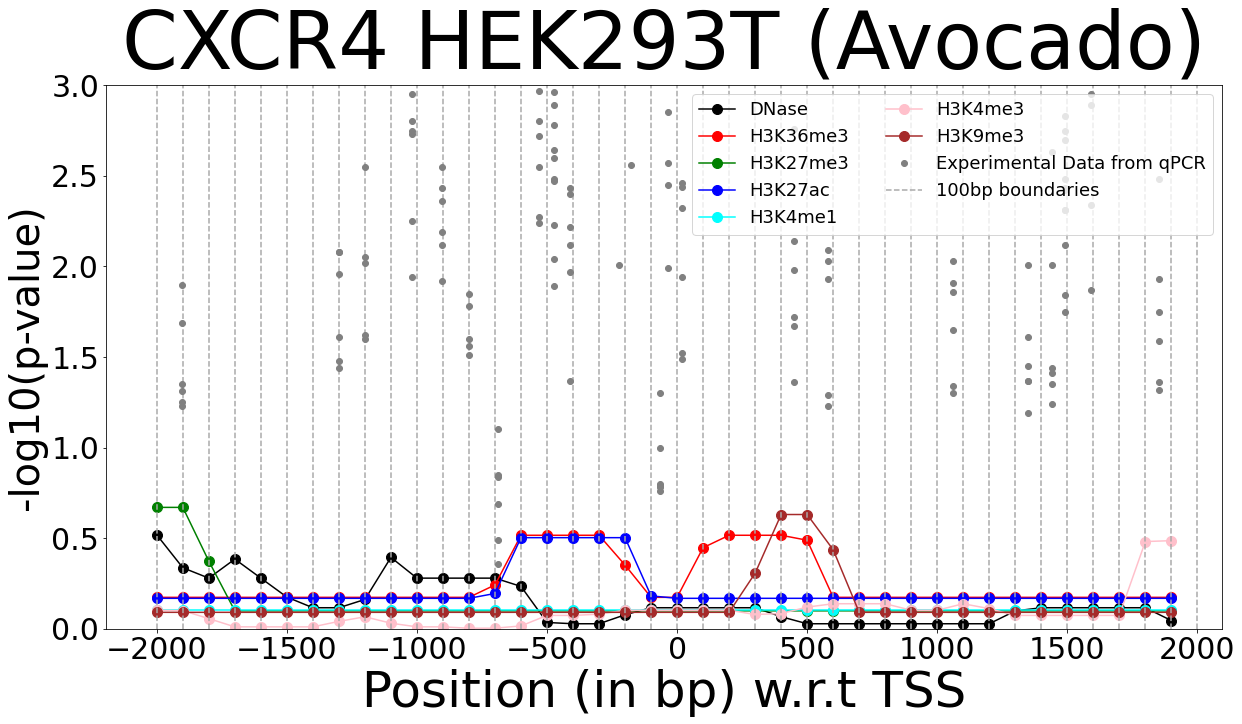

In [9]:
plt.rcParams["figure.figsize"] = (20, 10)
RESOLUTION = 25  # 100

# Load Alan's H3K27ac p300 dataset
df_CXCR4 = pd.read_csv("../Data/CXCR4.p300.tsv", sep="\t")
df_CXCR4_values = df_CXCR4[df_CXCR4['Position_wrt_TSS']!="Control"]
df_CXCR4_values["Position_wrt_TSS"] = pd.to_numeric(df_CXCR4_values["Position_wrt_TSS"], errors='coerce')/RESOLUTION

df_TGFBR1 = pd.read_csv("../Data/TGFBR1.p300.tsv", sep="\t")
df_TGFBR1_values = df_TGFBR1[df_TGFBR1['Position_wrt_TSS']!="Control"]
df_TGFBR1_values["Position_wrt_TSS"] = pd.to_numeric(df_TGFBR1_values["Position_wrt_TSS"], errors='coerce')/RESOLUTION

df = df_CXCR4_values


# CXCR4 = [136118149 - 5000, 136118149 + 5000][::-1]
# TGFBR1 = "chr9"[99105113 - 5000, 99105113 + 5000]

TSS = 136118149
half_window = 2000
strand = "-"
start = (TSS - half_window) // RESOLUTION
end = (TSS + half_window) // RESOLUTION

assay_color = ['black', 'red', 'green', 'blue', 'cyan', 'pink', 'brown']
for assay_index in range(7):
    v = assays[assay_names[assay_index]][start:end]
    if(strand == "-"):
        v = v[::-1]
    xticklabels = [RESOLUTION*x for x in range(-half_window//RESOLUTION, half_window//RESOLUTION)]
    plt.plot(xticklabels, v, 'o-', markersize=10, label=assay_names[assay_index], color=assay_color[assay_index])

for i in range(-half_window, half_window, 100):
    plt.axvline(x=i, linestyle='--', color='darkgrey')

plt.plot(df['Position_wrt_TSS']*100, df['Fold_Change'] * 1, 'o', color='gray', label="Experimental Data from qPCR")    
    
plt.axvline(x=half_window, color='darkgrey', linestyle='--', label='100bp boundaries')
plt.legend(loc='upper right', prop={'size': 18}, ncol=2)
plt.ylim(0, 3)
plt.title('CXCR4 HEK293T (Avocado)', fontsize=80)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.tick_params(axis='both', which='minor', labelsize=30)
plt.xlabel("Position (in bp) w.r.t TSS", size=50)
plt.ylabel("-log10(p-value)", size=40)
plt.show()
plt.close()

Current shape is = 7261531


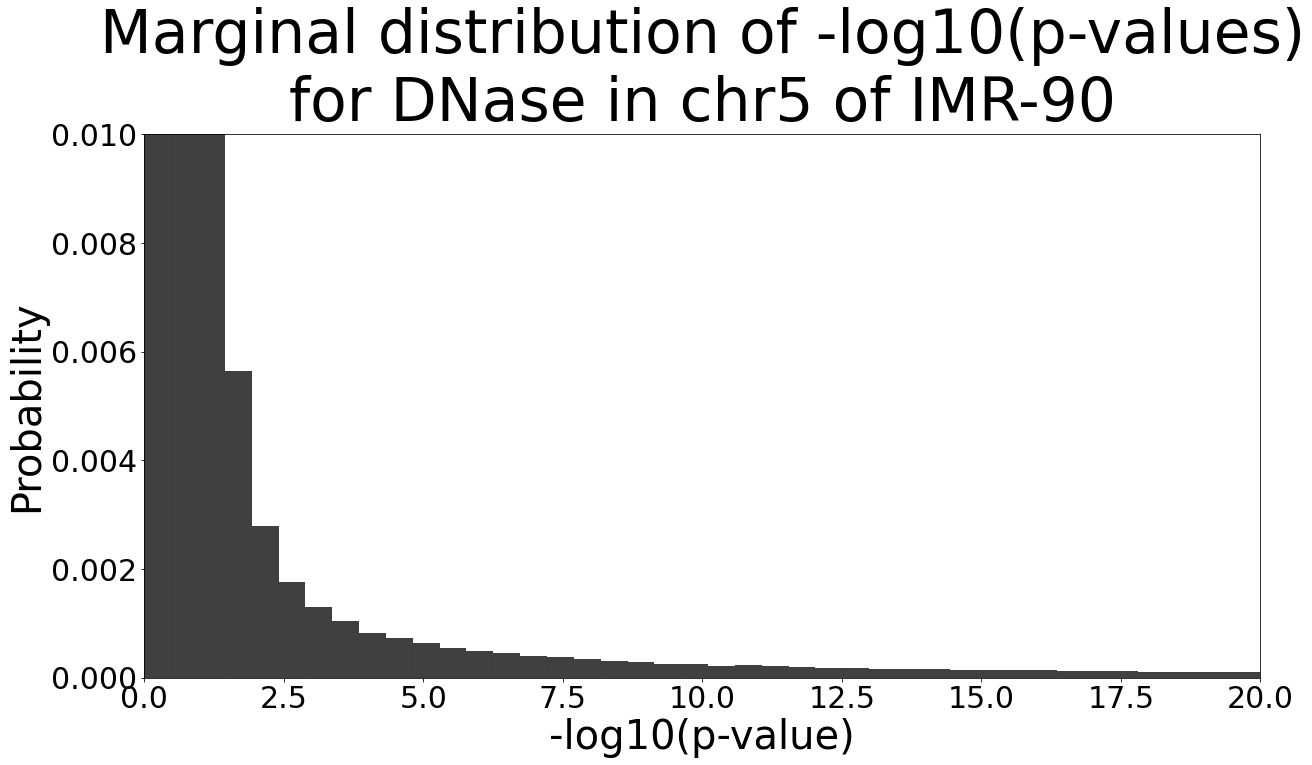

Current shape is = 7261531


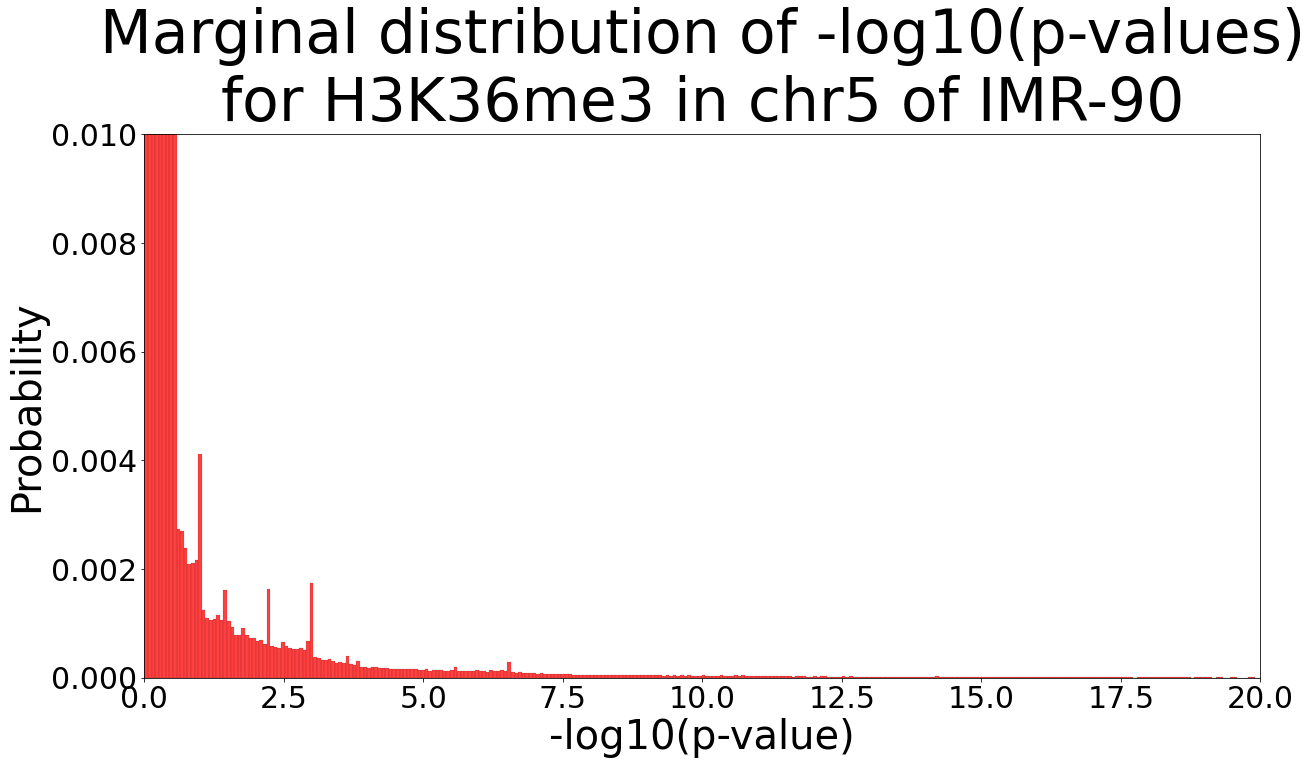

Current shape is = 7261531


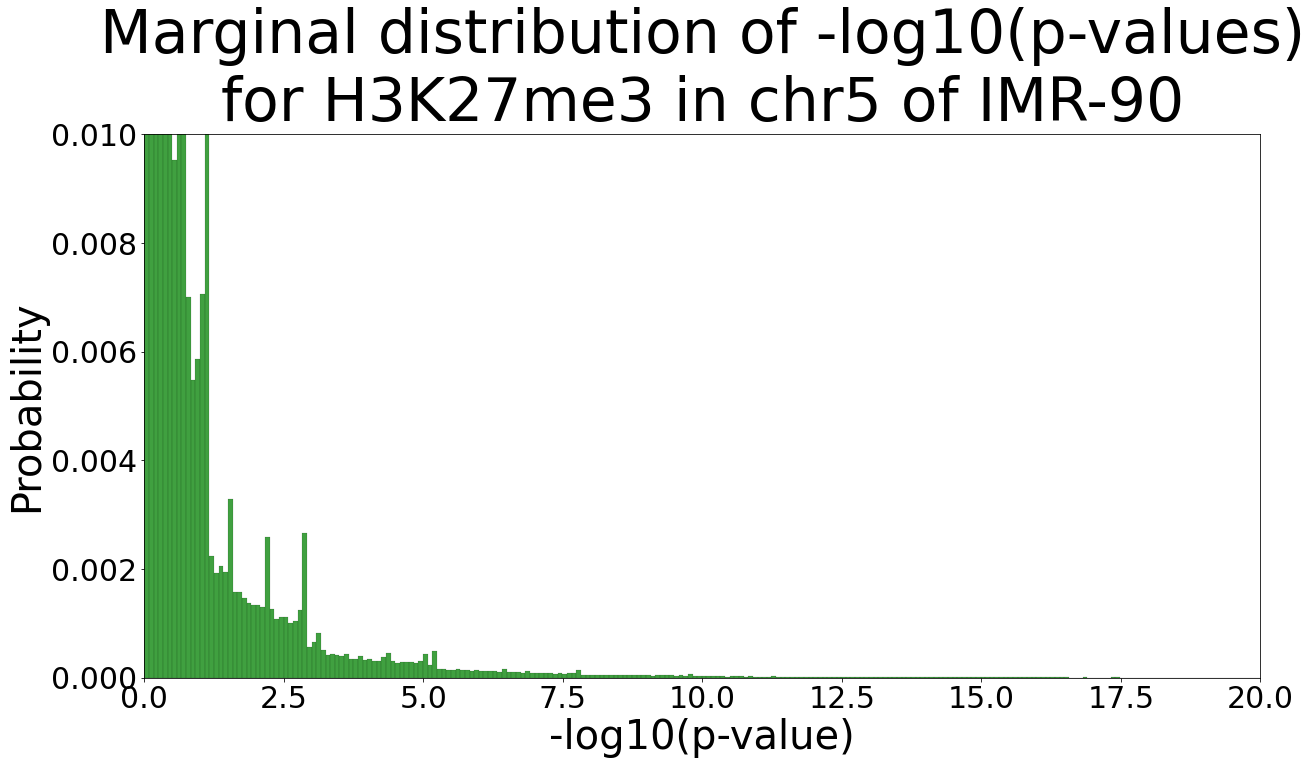

Current shape is = 7261531


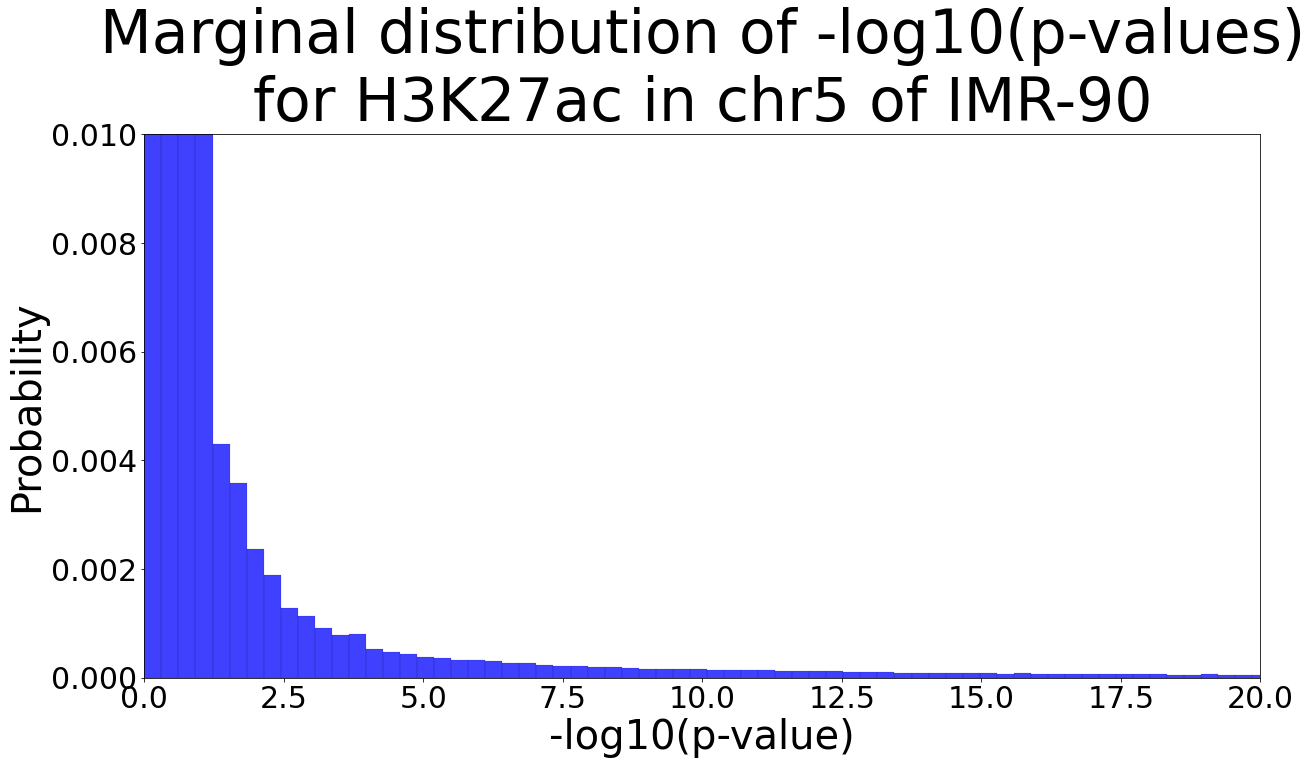

Current shape is = 7261531


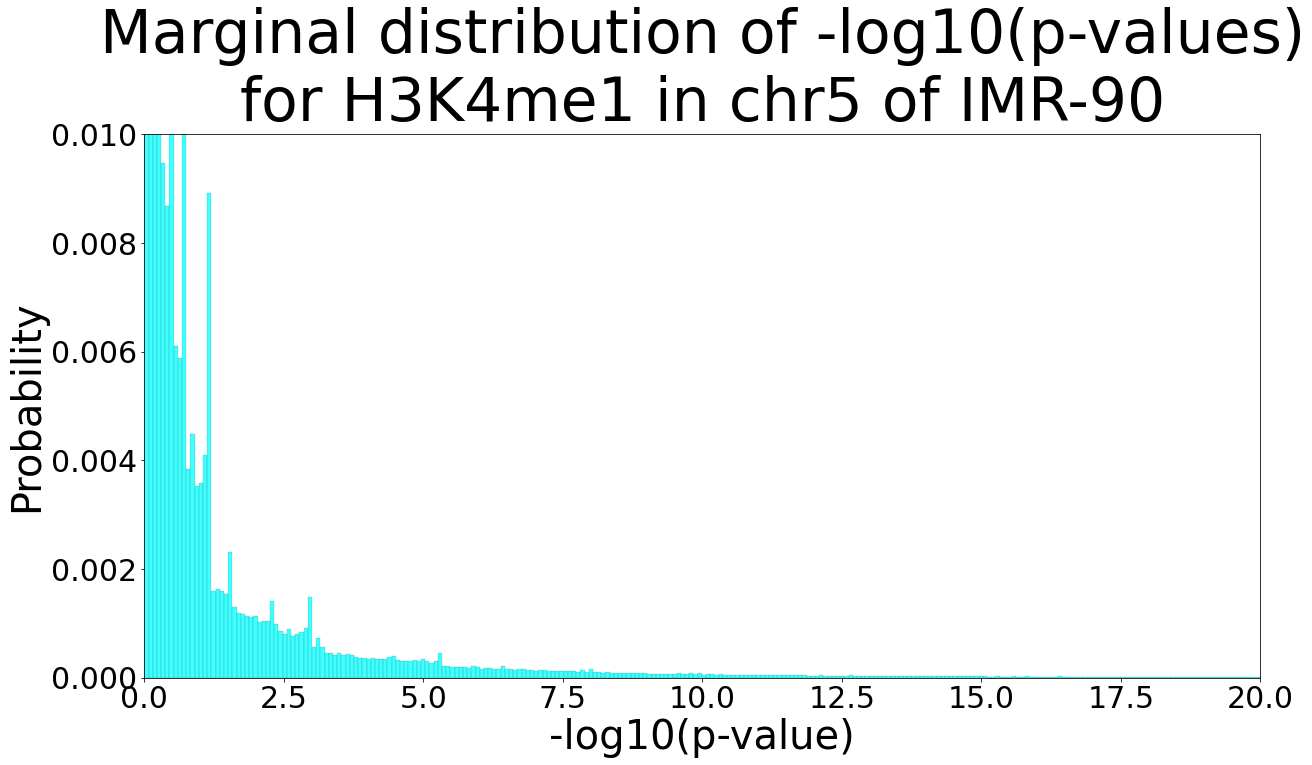

Current shape is = 7261531


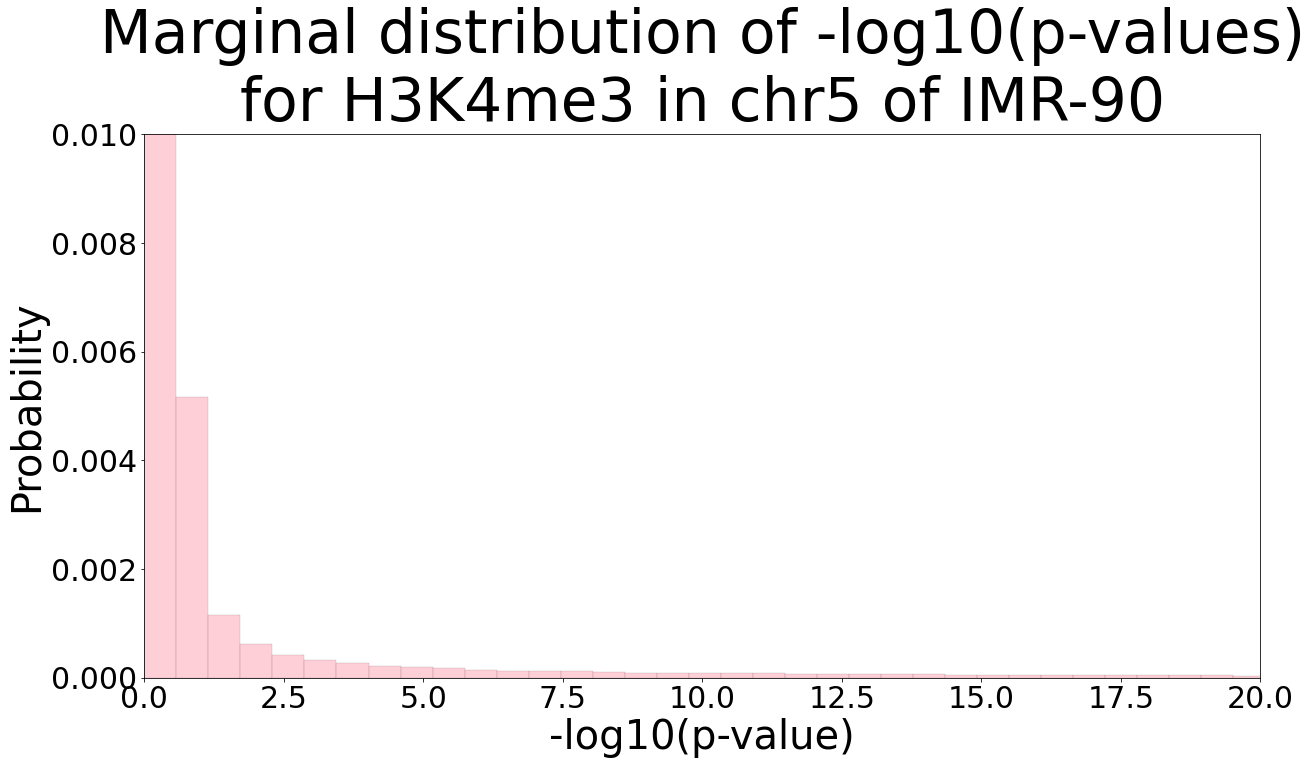

Current shape is = 7261531


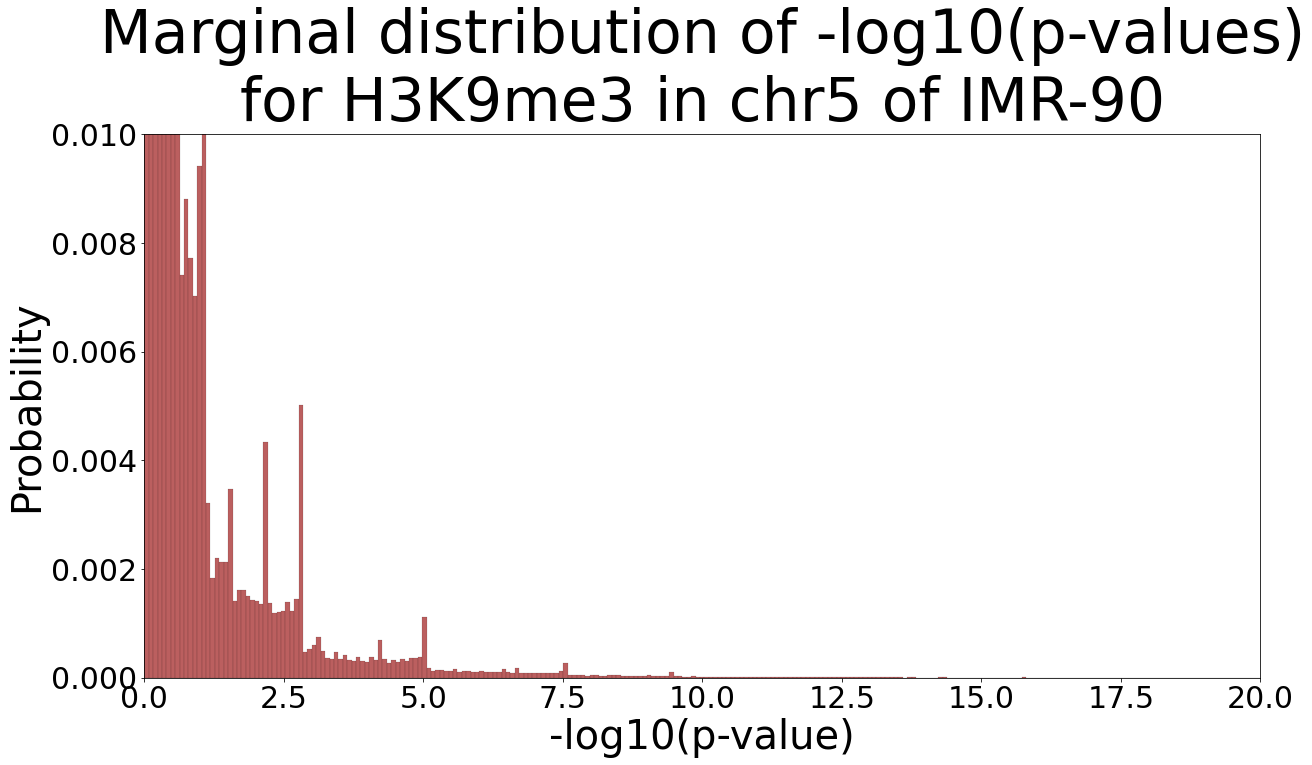

In [10]:
# Analyze marginal distribution of -log10(p-values) for each assay
plt.rcParams["figure.figsize"] = (20, 10)
# sns.histplot(np.power(10, -assays[assay_names[1]]), bins=100)

# Plot -log10(p) values
for assay in range(7):
    plt.figure(assay+1)
    length = assays[assay_names[assay]].shape[0]
    print("Current shape is =", length)
    if(assay == 0):
        num_bins = 10000
    else:
        num_bins = 1000
    sns.histplot(assays[assay_names[assay]][int(0.1*length):int(0.9*length)], bins=num_bins, cumulative=False, stat='probability', color=assay_color[assay])
    plt.title("Marginal distribution of -log10(p-values)\nfor "+assay_names[assay]+" in chr5 of IMR-90", size=60)
    plt.xlabel("-log10(p-value)", size=40)
    plt.ylabel("Probability", size=40)
    plt.tick_params(axis='both', which='major', labelsize=30)
    plt.xlim(0, 20)
    plt.ylim(0, 0.01)
    plt.show()
    plt.close()



In [ ]:
# Analyze joint distribution of -log10(p-values) for each assay with H3K27ac
plt.rcParams["figure.figsize"] = (15, 15)
for assay in range(7):
    plt.figure(assay+1)
    length = assays[assay_names[assay]].shape[0]
    print("Current shape is =", length)
    plt.plot(assays[assay_names[assay]][100000:303000], assays[assay_names[3]][100000:303000], 
             'o', MarkerSize=0.5, color=assay_color[assay])
#              kind="scatter", height=20, xlim=(0,5), ylim=(0,5))
    plt.title("Covariation of "+assay_names[assay]+" and\nH3K27ac in chr5 of IMR-90", size=60)
    plt.xlabel(assay_names[assay], size=40)
    plt.ylabel(assay_names[3], size=40)
    plt.tick_params(axis='both', which='major', labelsize=30)
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.show()
    plt.close()


